# Helsinki Bike Network

## Wstęp

## Import bibliotek

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

import datetime
import calendar
import warnings

In [16]:

pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Import danych

In [17]:
df = pd.read_csv("./database.csv", low_memory=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12157458 entries, 0 to 12157457
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   departure               object 
 1   return                  object 
 2   departure_id            object 
 3   departure_name          object 
 4   return_id               object 
 5   return_name             object 
 6   distance (m)            float64
 7   duration (sec.)         float64
 8   avg_speed (km/h)        float64
 9   departure_latitude      float64
 10  departure_longitude     float64
 11  return_latitude         float64
 12  return_longitude        float64
 13  Air temperature (degC)  float64
dtypes: float64(8), object(6)
memory usage: 1.3+ GB


## Podsumowanie zbioru danych

- Liczba wpisów: 12 157 458
- Kolumny: 14

### Szczegóły kolumn

1. `departure`: Obiekt (łańcuch znaków) - miejsce wyjazdu
2. `return`: Obiekt (łańcuch znaków) - miejsce powrotu
3. `departure_id`: Obiekt (łańcuch znaków) - identyfikator miejsca wyjazdu
4. `departure_name`: Obiekt (łańcuch znaków) - nazwa miejsca wyjazdu
5. `return_id`: Obiekt (łańcuch znaków) - identyfikator miejsca powrotu
6. `return_name`: Obiekt (łańcuch znaków) - nazwa miejsca powrotu
7. `distance (m)`: Float64 (liczba zmiennoprzecinkowa) - odległość w metrach
8. `duration (sec.)`: Float64 (liczba zmiennoprzecinkowa) - czas trwania w sekundach
9. `avg_speed (km/h)`: Float64 (liczba zmiennoprzecinkowa) - średnia prędkość w km/h
10. `departure_latitude`: Float64 (liczba zmiennoprzecinkowa) - szerokość geograficzna miejsca wyjazdu
11. `departure_longitude`: Float64 (liczba zmiennoprzecinkowa) - długość geograficzna miejsca wyjazdu
12. `return_latitude`: Float64 (liczba zmiennoprzecinkowa) - szerokość geograficzna miejsca powrotu
13. `return_longitude`: Float64 (liczba zmiennoprzecinkowa) - długość geograficzna miejsca powrotu
14. `Air temperature (degC)`: Float64 (liczba zmiennoprzecinkowa) - temperatura powietrza w stopniach Celsiusza

### Zużycie pamięci
- Przybliżone zużycie pamięci: 1.3+ GB


Wyświetlenie pierwszych 5 wierszy zbioru danych:

In [19]:
df.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.000,401.000,0.261,60.195,24.902,60.198,24.927,0.900
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.000,869.000,0.100,60.169,24.931,60.165,24.949,0.900
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.000,469.000,0.227,60.196,25.054,60.187,25.036,0.900
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.000,2406.000,0.186,60.228,24.820,60.203,24.899,0.900
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.000,1679.000,0.254,60.159,24.910,60.186,24.968,0.900


Wyświetlenie podsumowania statystyk zbioru danych:

In [21]:
df.describe()

,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
count,12157458.000,12157458.000,12153908.000,12157458.000,12157458.000,12157457.000,12157457.000,12141556.000
mean,2295.275,959.775,0.336,60.180,24.920,60.180,24.920,15.650
std,24520.672,7346.528,34.280,0.017,0.058,0.017,0.058,5.498
min,-4292467.000,0.000,-468.900,60.148,24.721,60.148,24.721,-5.200
25%,1000.000,344.000,0.147,60.167,24.910,60.167,24.910,12.300
50%,1739.000,586.000,0.186,60.176,24.934,60.176,24.934,16.400
75%,2869.000,971.000,0.220,60.190,24.950,60.190,24.950,19.300
max,3681399.000,5401659.000,16991.035,60.239,25.106,60.239,25.106,32.900


In [20]:
df.isnull().sum()

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
dtype: int64

In [22]:
#delete missing rows

df = df.dropna()

In [23]:
df.isnull().sum()

departure                 0
return                    0
departure_id              0
departure_name            0
return_id                 0
return_name               0
distance (m)              0
duration (sec.)           0
avg_speed (km/h)          0
departure_latitude        0
departure_longitude       0
return_latitude           0
return_longitude          0
Air temperature (degC)    0
dtype: int64

## EDA
### Zmiana nazw kolumn 

In [24]:
df.rename(columns={'distance (m)': 'distance', 'duration (sec.)': 'duration', 'avg_speed (km/h)':'avg_speed', 'Air temperature (degC)':'temperature'}, inplace=True)

Przetworzenie danych czasowych na odpowiedni format:


In [25]:
df[["departure", "return"]] = df[["departure", "return"]].apply(
    pd.to_datetime
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12138008 entries, 0 to 12157457
Data columns (total 14 columns):
 #   Column               Dtype         
---  ------               -----         
 0   departure            datetime64[ns]
 1   return               datetime64[ns]
 2   departure_id         object        
 3   departure_name       object        
 4   return_id            object        
 5   return_name          object        
 6   distance             float64       
 7   duration             float64       
 8   avg_speed            float64       
 9   departure_latitude   float64       
 10  departure_longitude  float64       
 11  return_latitude      float64       
 12  return_longitude     float64       
 13  temperature          float64       
dtypes: datetime64[ns](2), float64(8), object(4)
memory usage: 1.4+ GB


Czyszczenie danych do akceptowalnych jakości

In [26]:
df[["distance", "duration", "temperature", "avg_speed"]].describe()

,distance,duration,temperature,avg_speed
count,12138008.000,12138008.000,12138008.000,12138008.000
mean,2296.183,960.187,15.650,0.336
std,24540.204,7351.542,5.498,34.303
min,-4292467.000,1.000,-5.200,-468.900
25%,1000.000,344.000,12.300,0.147
50%,1739.000,586.000,16.400,0.186
75%,2869.000,971.000,19.300,0.220
max,3681399.000,5401659.000,32.900,16991.035


Dystans nie powinien być mniejszy niż 0 metrów, a czas trwania nie powinien być równy 0 sekund. Oznacza to błędy w danych, które musimy usunąć.
Ciekawym jest fakt, że średnio przejazd trwa ok 15 minut. Średni dystans to ok 2300m.

In [27]:
min_distance = 50 # 50 meters
min_duration = 120 #  2 minutes
min_temperature = -20 # -20 degrees
max_temperature = 40 # 40 degrees
max_distance = 10000 # 10 km
max_duration = 18000 # 5 hours

In [28]:
df = df[
    (min_distance < df["distance"]) 
    & (df["distance"] < max_distance)  
    & (min_duration < df["duration"]) 
    & (df["duration"] < max_duration)  
    & (min_temperature < df["temperature"])  
    & (df["temperature"] < max_temperature)  
]

df[["distance", "duration", "temperature", "avg_speed"]].describe()

,distance,duration,temperature,avg_speed
count,11278849.000,11278849.000,11278849.000,11278849.000
mean,2242.385,783.600,15.637,0.188
std,1494.708,795.838,5.495,0.054
min,51.000,121.000,-5.200,0.000
25%,1121.000,380.000,12.300,0.156
50%,1847.000,615.000,16.400,0.190
75%,2964.000,991.000,19.300,0.223
max,9999.000,17998.000,32.900,4.454


Trend częstości przejazdów ze względu na czas (rok, miesiąc, dzień)

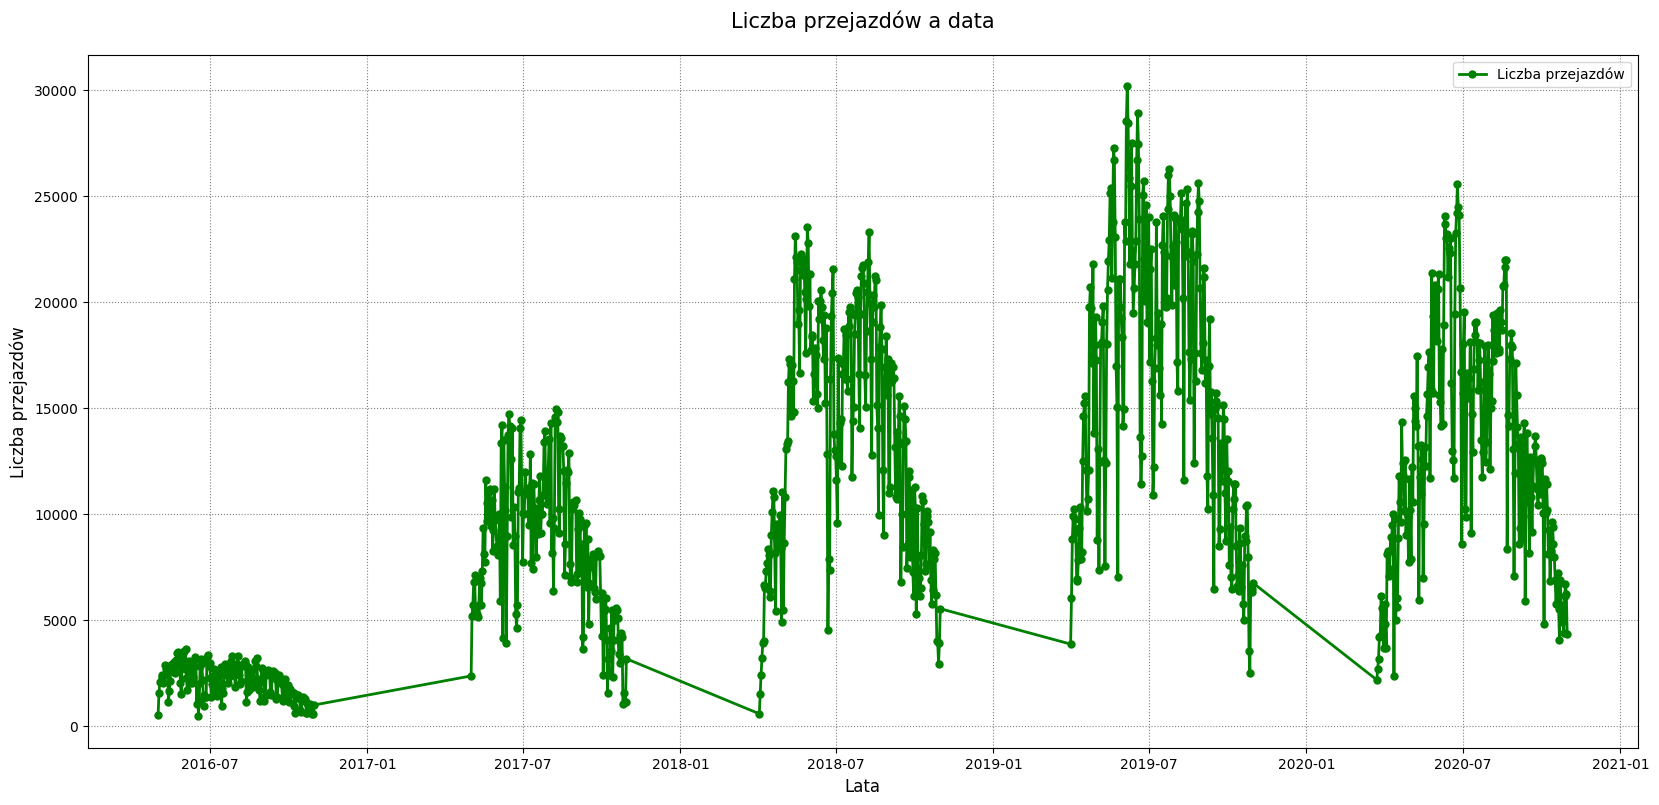

In [29]:
def trips_over_datetime(dataframe):
    # Data
    df = dataframe.copy()
    df_over_time = df.groupby(df["departure"].dt.date).size().reset_index(name="count")

    # Figure
    fig, ax = plt.subplots(figsize=(20, 9))
    plt.plot(df_over_time["departure"], df_over_time["count"], color="green", linewidth=2, marker="o", markersize=5)

    # Labels
    ax.set_title("Liczba przejazdów a data", fontsize=15, pad=20)
    ax.set_ylabel("Liczba przejazdów", fontsize=12)
    ax.set_xlabel("Lata", fontsize=12)

    # Grid & Legend
    plt.grid(linestyle=":", color="grey")
    plt.legend(["Liczba przejazdów"])

    plt.show()


trips_over_datetime(df)

Rozkład długości przejazdu

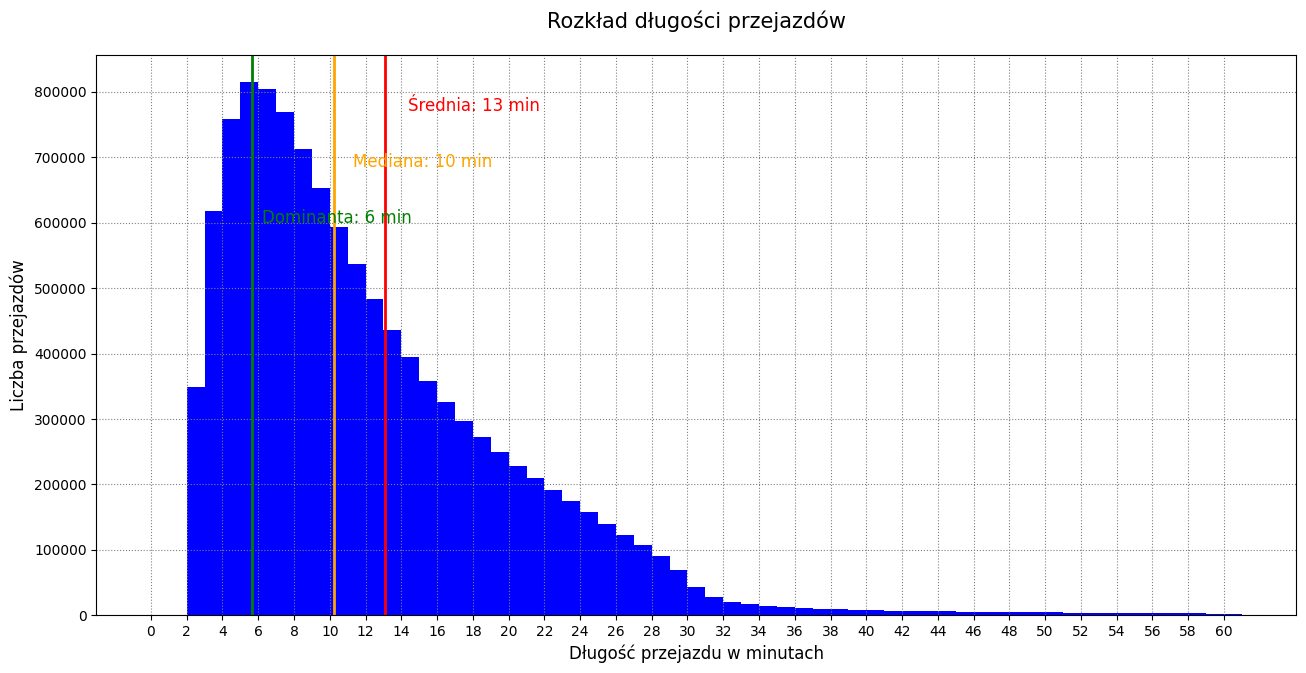

In [30]:
def duration_distribution(df):
    df = df.copy()
    df["duration"] = df["duration"] / 60  # minutes

    duration_data = df["duration"]
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    # Ploting the histogram
    plt.hist(duration_data, bins = range(62), color = 'blue', histtype ="bar")

    # Adding median and mean lines
    plt.axvline(df["duration"].mean(), color="red", linestyle="-", linewidth=2)
    plt.axvline(df["duration"].median(), color="orange", linestyle="-", linewidth=2)
    plt.axvline(df["duration"].mode()[0], color="green", linestyle="-", linewidth=2)
    
    # Adding median and mean texts
    min_ylim, max_ylim = plt.ylim()
    plt.text(df["duration"].mean()*1.1, max_ylim*0.9, 'Średnia: {:.0f} min'.format(df["duration"].mean()), color = 'red',  fontsize= 12)
    plt.text(df["duration"].median()*1.1, max_ylim*0.8, 'Mediana: {:.0f} min'.format(df["duration"].median()), color = 'orange', fontsize= 12)
    plt.text(df["duration"].mode()[0]*1.1, max_ylim*0.7, 'Dominanta: {:.0f} min'.format(df["duration"].mode()[0]), color = 'green', fontsize= 12)

    # Seting ticks on x axis
    ticks =range(0, 62, 2)
    plt.xticks(ticks)
    # Seting ticks on y axis
    ticks =range(0, 3600, 2000)

    # Labeling Axes
    plt.xlabel("Długość przejazdu w minutach", fontsize= 12, x = 0.5)
    plt.ylabel("Liczba przejazdów", fontsize= 12)
    plt.title("Rozkład długości przejazdów", fontsize= 15, pad= 20)

    # Adding Grid
    plt.grid(linestyle=":", color='grey')

    plt.show()


duration_distribution(df)

Rozkład dystansu przejazdów

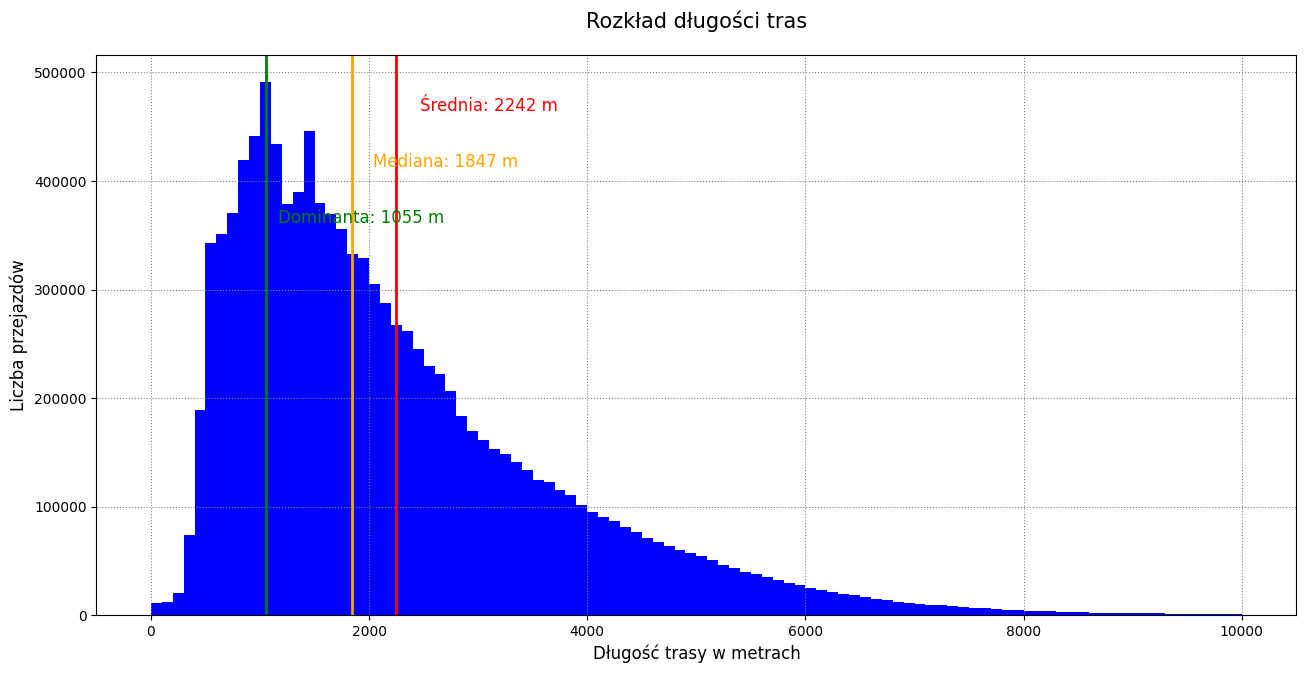

In [31]:
def distance_dist(df, year=None):
    df = df.copy()
    if year:
        df = df[df["departure"].dt.year == year]

    distance_data = df["distance"] 

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

    # Ploting the histogram
    plt.hist(distance_data, bins = range(0, 10001, 100), color = 'blue', histtype ="bar")

    # Adding median and mean lines
    plt.axvline(df["distance"].mean(), color="red", linestyle="-", linewidth=2)
    plt.axvline(df["distance"].median(), color="orange", linestyle="-", linewidth=2)
    plt.axvline(df["distance"].mode()[0], color="green", linestyle="-", linewidth=2)

    # Adding median and mean texts
    min_ylim, max_ylim = plt.ylim()
    plt.text(df["distance"].mean()*1.1, max_ylim*0.9, 'Średnia: {:.0f} m'.format(df["distance"].mean()), color = 'red',  fontsize= 12)
    plt.text(df["distance"].median()*1.1, max_ylim*0.8, 'Mediana: {:.0f} m'.format(df["distance"].median()), color = 'orange', fontsize= 12)
    plt.text(df["distance"].mode()[0]*1.1, max_ylim*0.7, 'Dominanta: {:.0f} m'.format(df["distance"].mode()[0]), color = 'green', fontsize= 12)


    # Labeling Axes
    plt.xlabel("Długość trasy w metrach", fontsize= 12, x = 0.5)
    plt.ylabel("Liczba przejazdów", fontsize= 12)
    if year:
        plt.title(f"Rozkład długości tras {year}", fontsize= 15, pad= 20)
    else:
        plt.title("Rozkład długości tras", fontsize= 15, pad= 20)

    # Adding Grid
    plt.grid(linestyle=":", color='grey')

    plt.show()

distance_dist(df) 
    

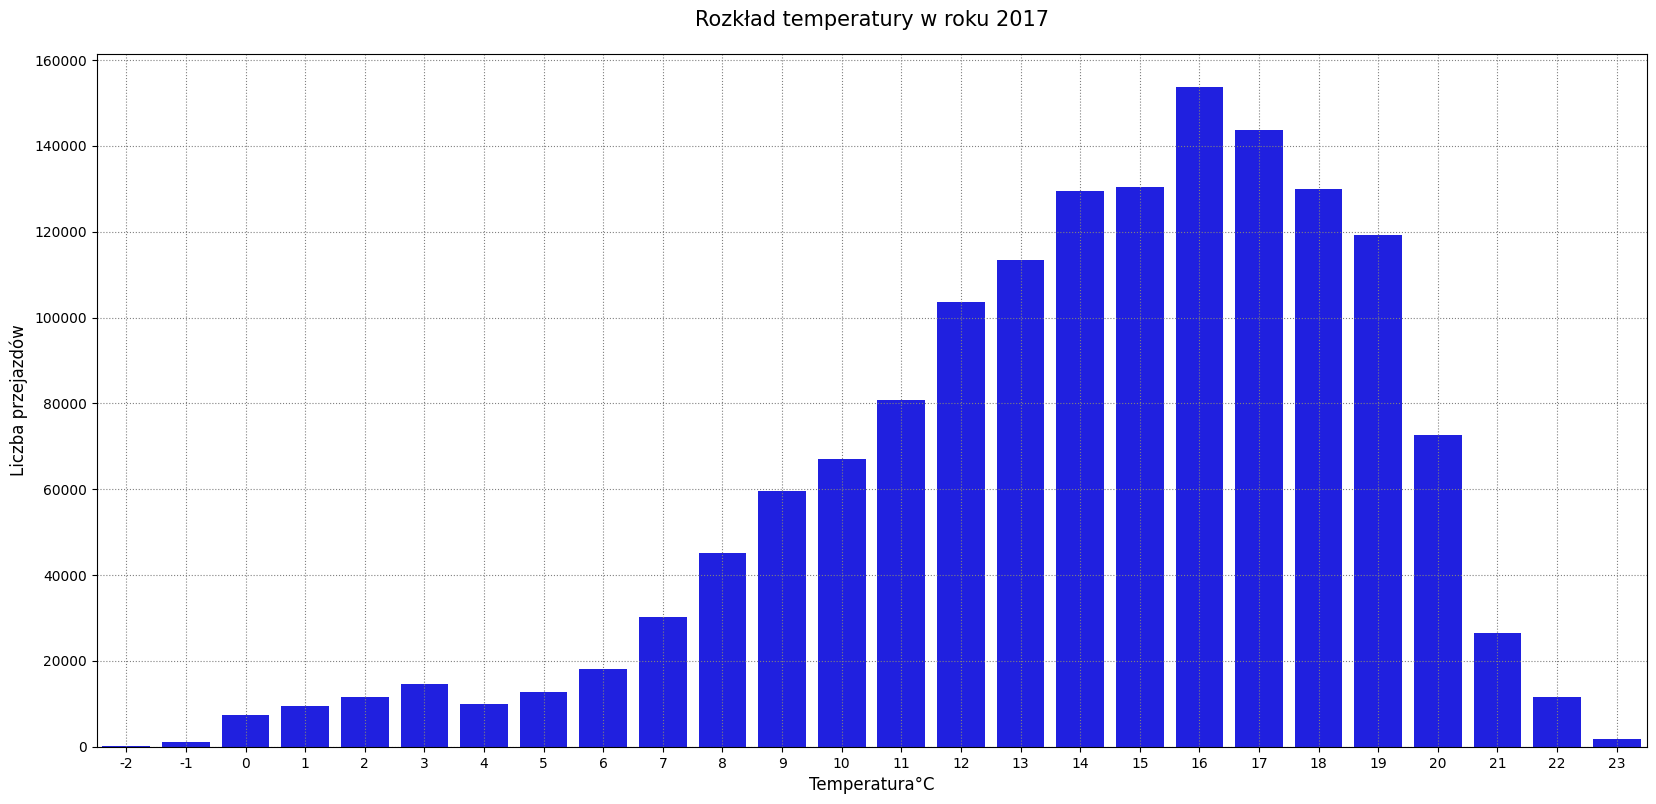

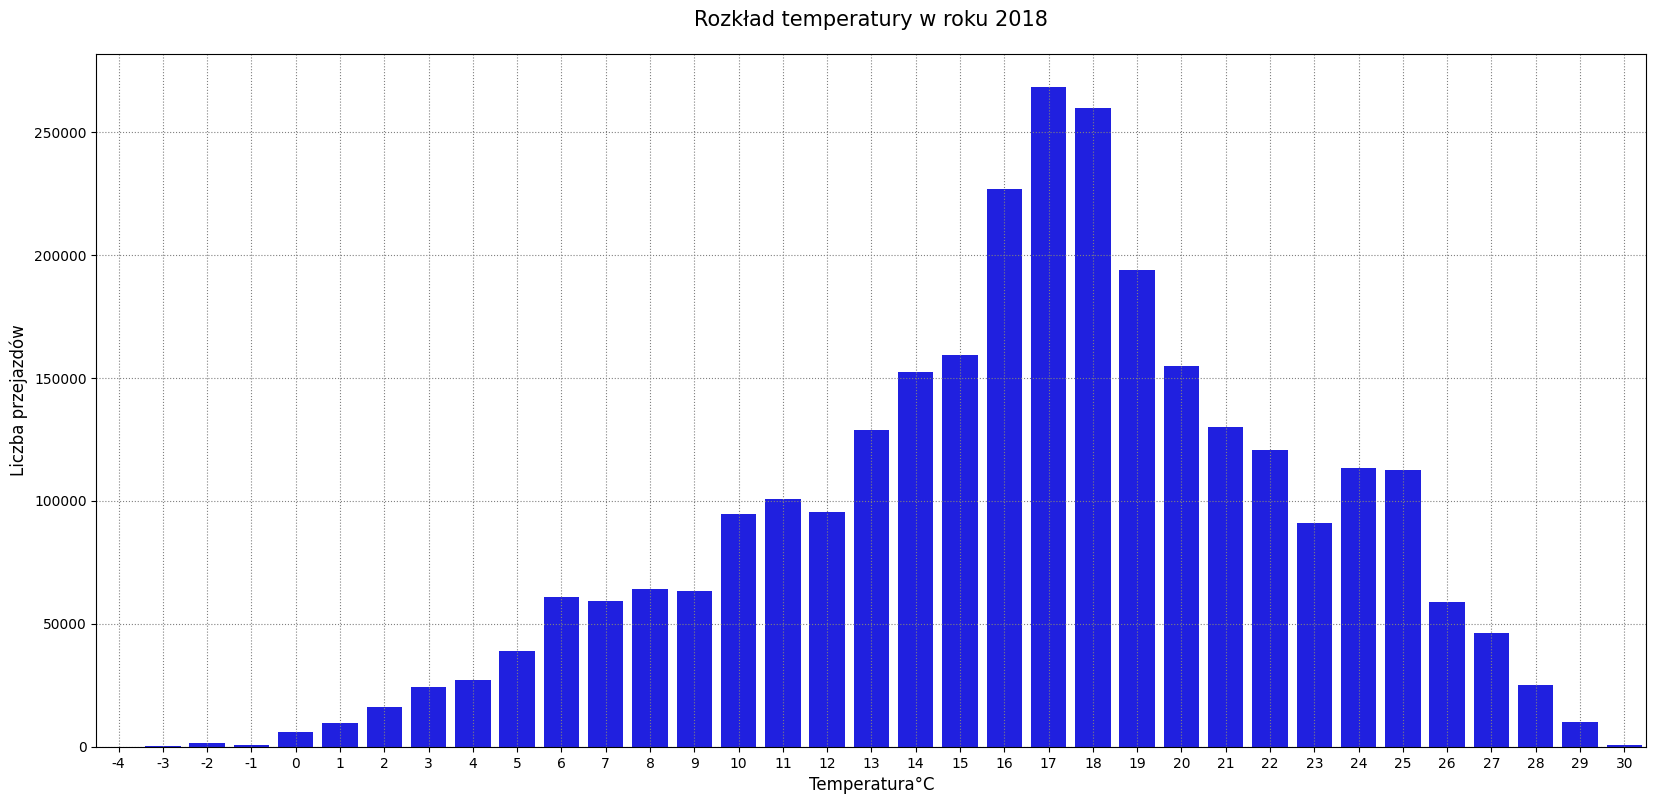

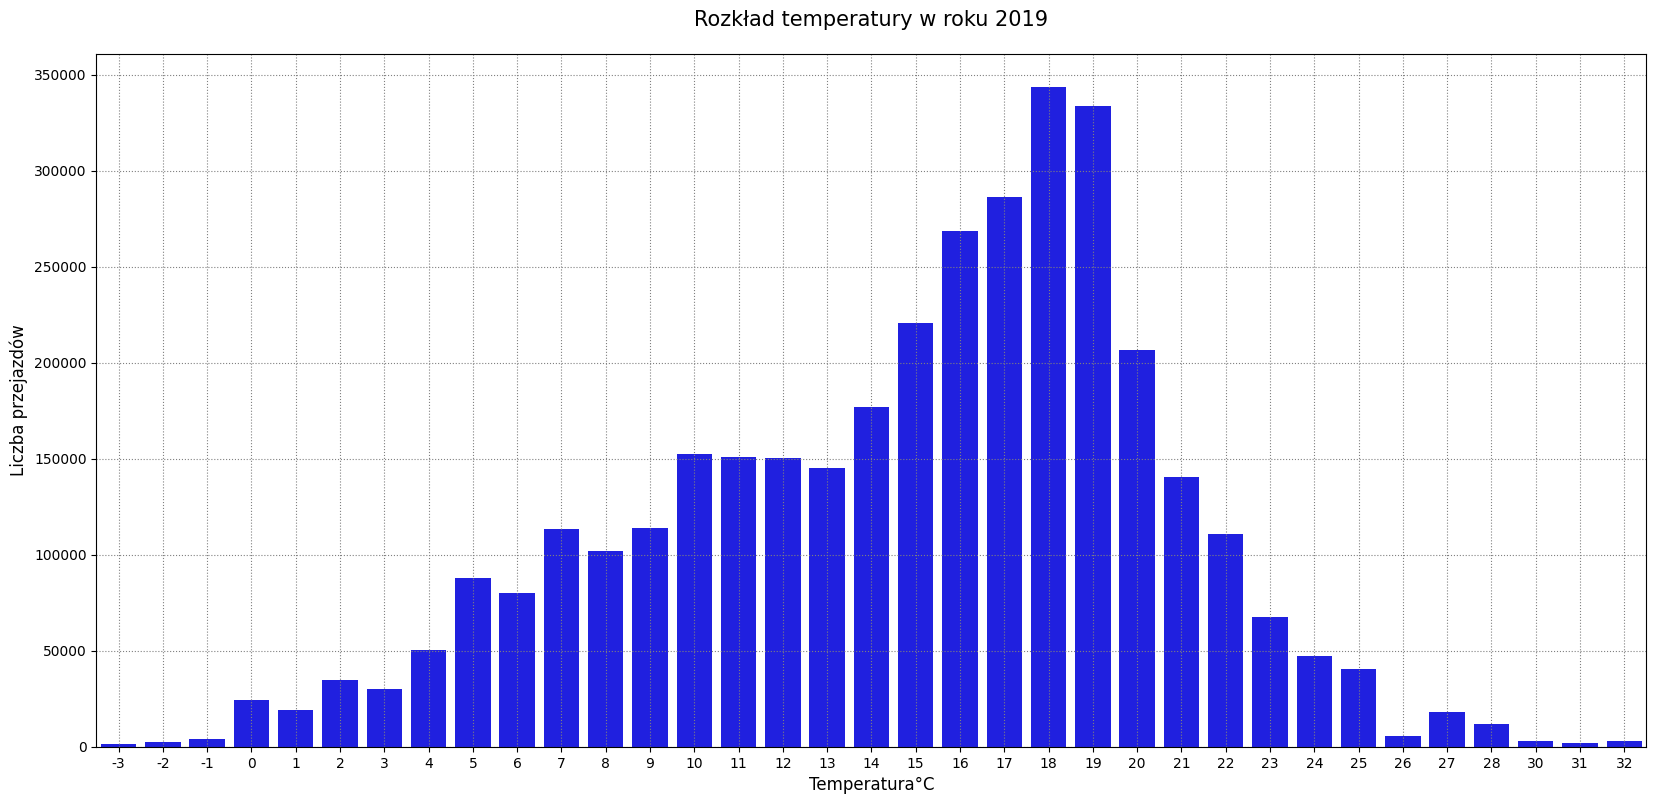

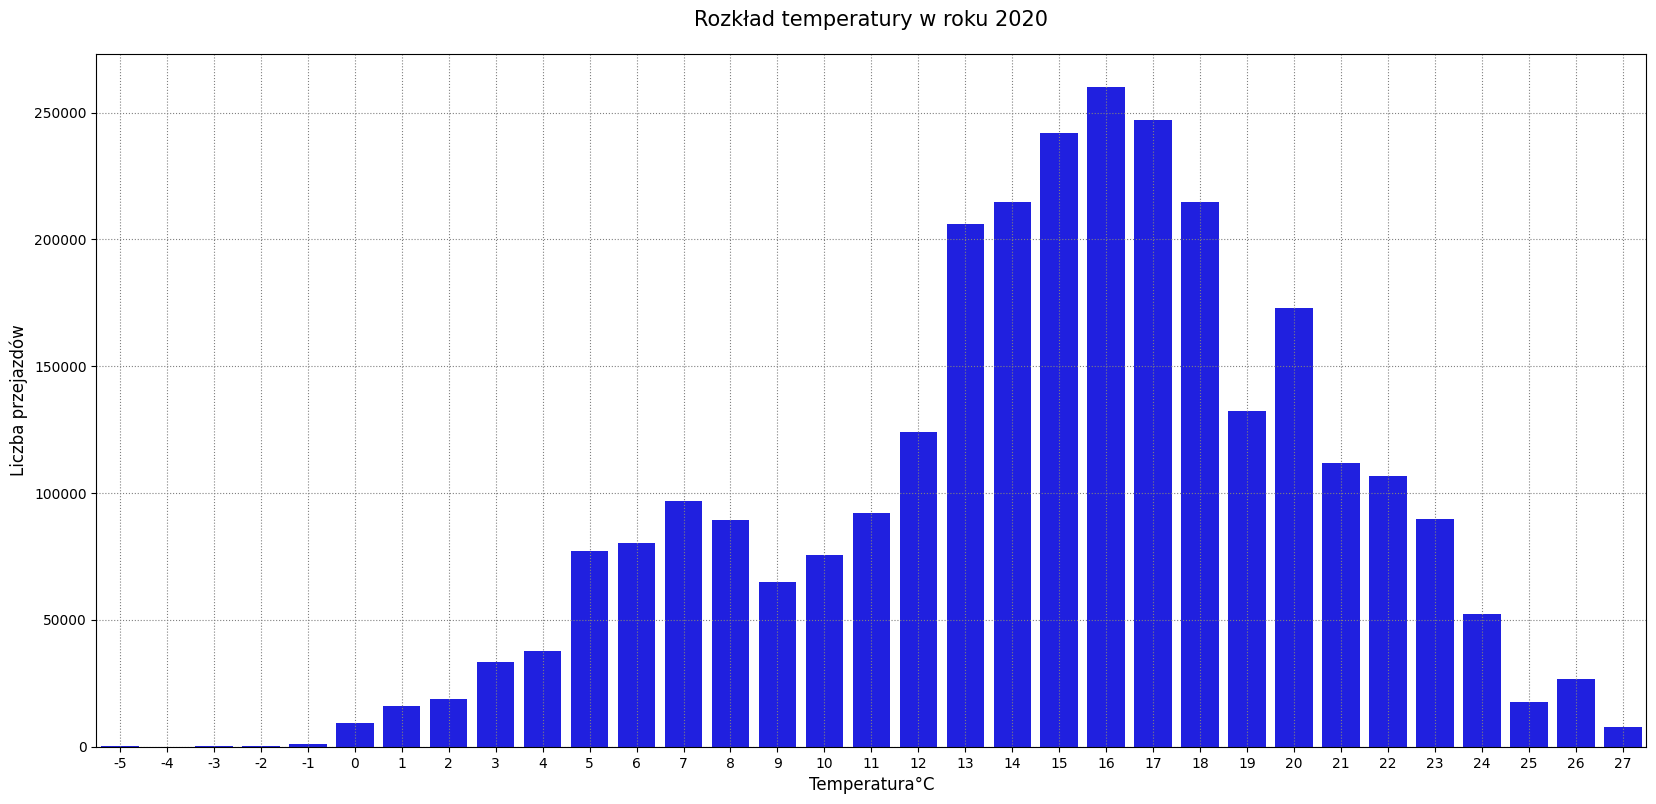

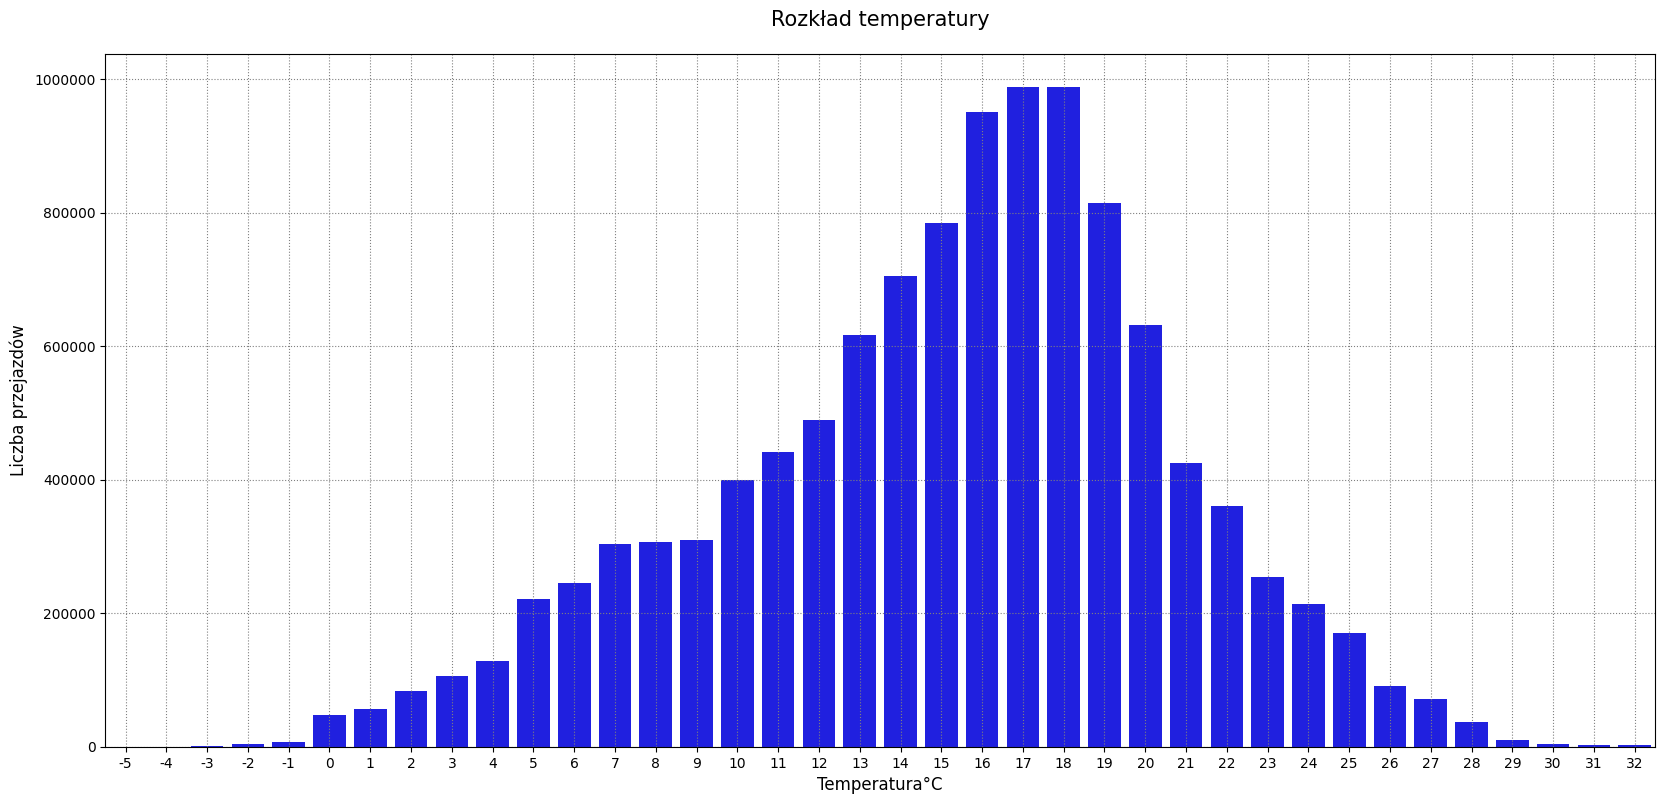

In [32]:
def temperature_dist(dataframe, year=None):
    # Data
    df = dataframe.copy()
    df.dropna(inplace=True)
    if year:
        df = df[df["departure"].dt.year == year]
    df["temperature"] = df["temperature"].astype(int)

    # Figure
    fig, ax = plt.subplots(figsize=(20, 9))
    ax = sns.countplot(x="temperature", data=df, color='blue')

    # Labels
    ax.set_xlabel("Temperatura°C", fontsize=12, x=0.5)
    ax.set_ylabel("Liczba przejazdów", fontsize=12)
    if year:
        ax.set_title(f"Rozkład temperatury w roku {year}", fontsize=15, pad=20)
    else:
        ax.set_title("Rozkład temperatury", fontsize=15, pad=20)
    plt.ticklabel_format(style="plain", axis="y")

    # Grid
    ax.grid(linestyle=":", color="grey")

    plt.show()


temperature_dist(df, 2017)
temperature_dist(df, 2018)
temperature_dist(df, 2019)
temperature_dist(df, 2020)
temperature_dist(df)

/tmp/ipykernel_221699/2194038944.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_221699/2194038944.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_221699/2194038944.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_221699/2194038944.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_221699/2194038944.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


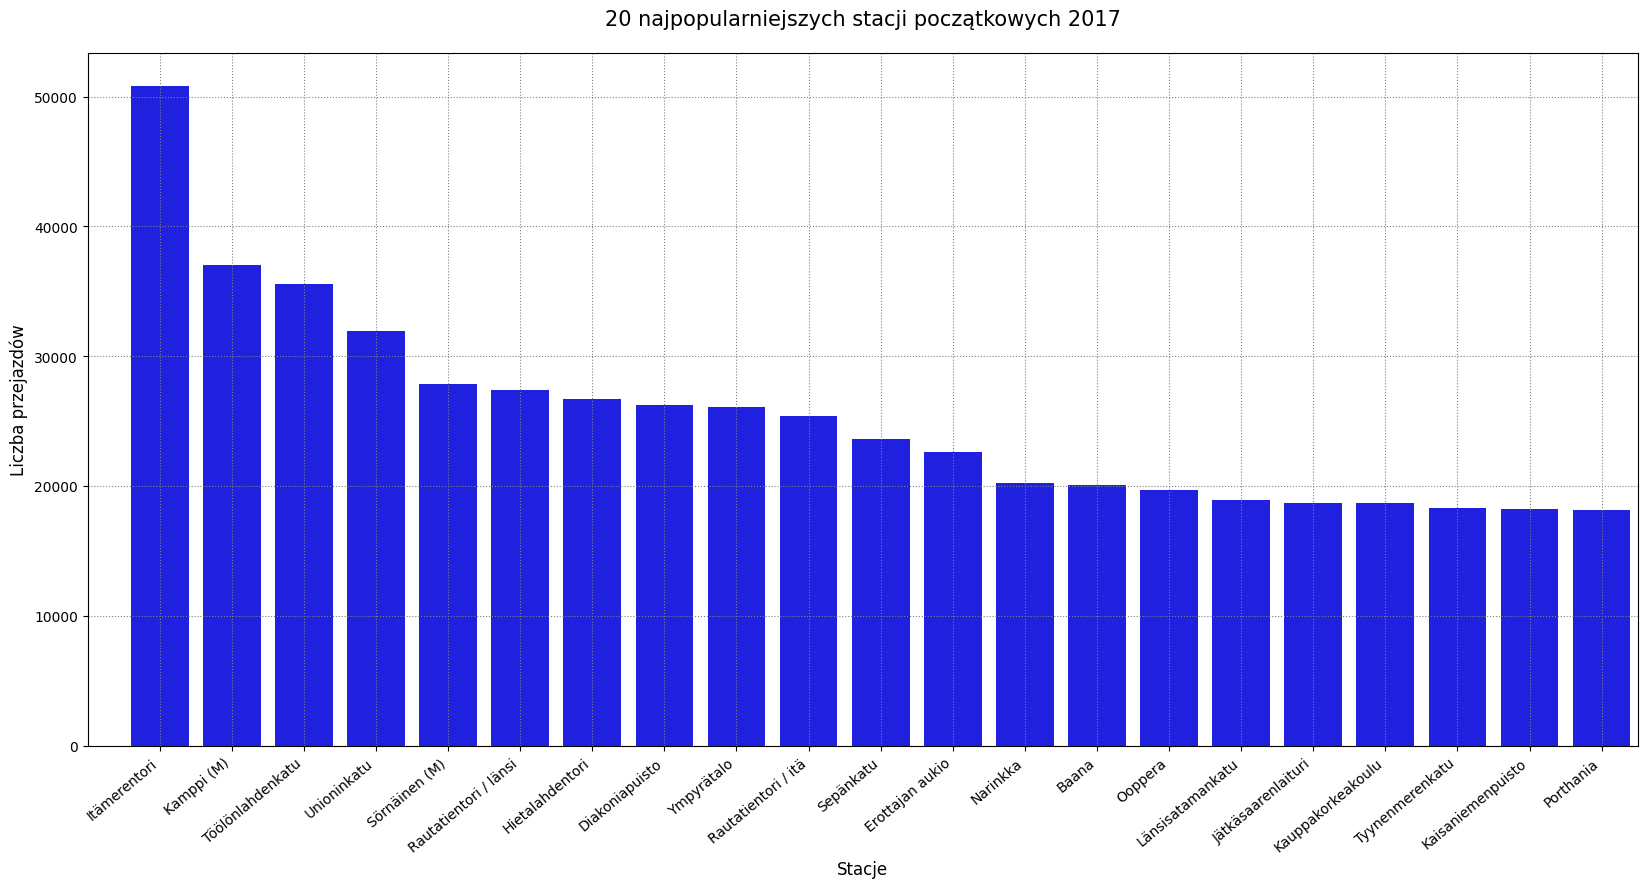

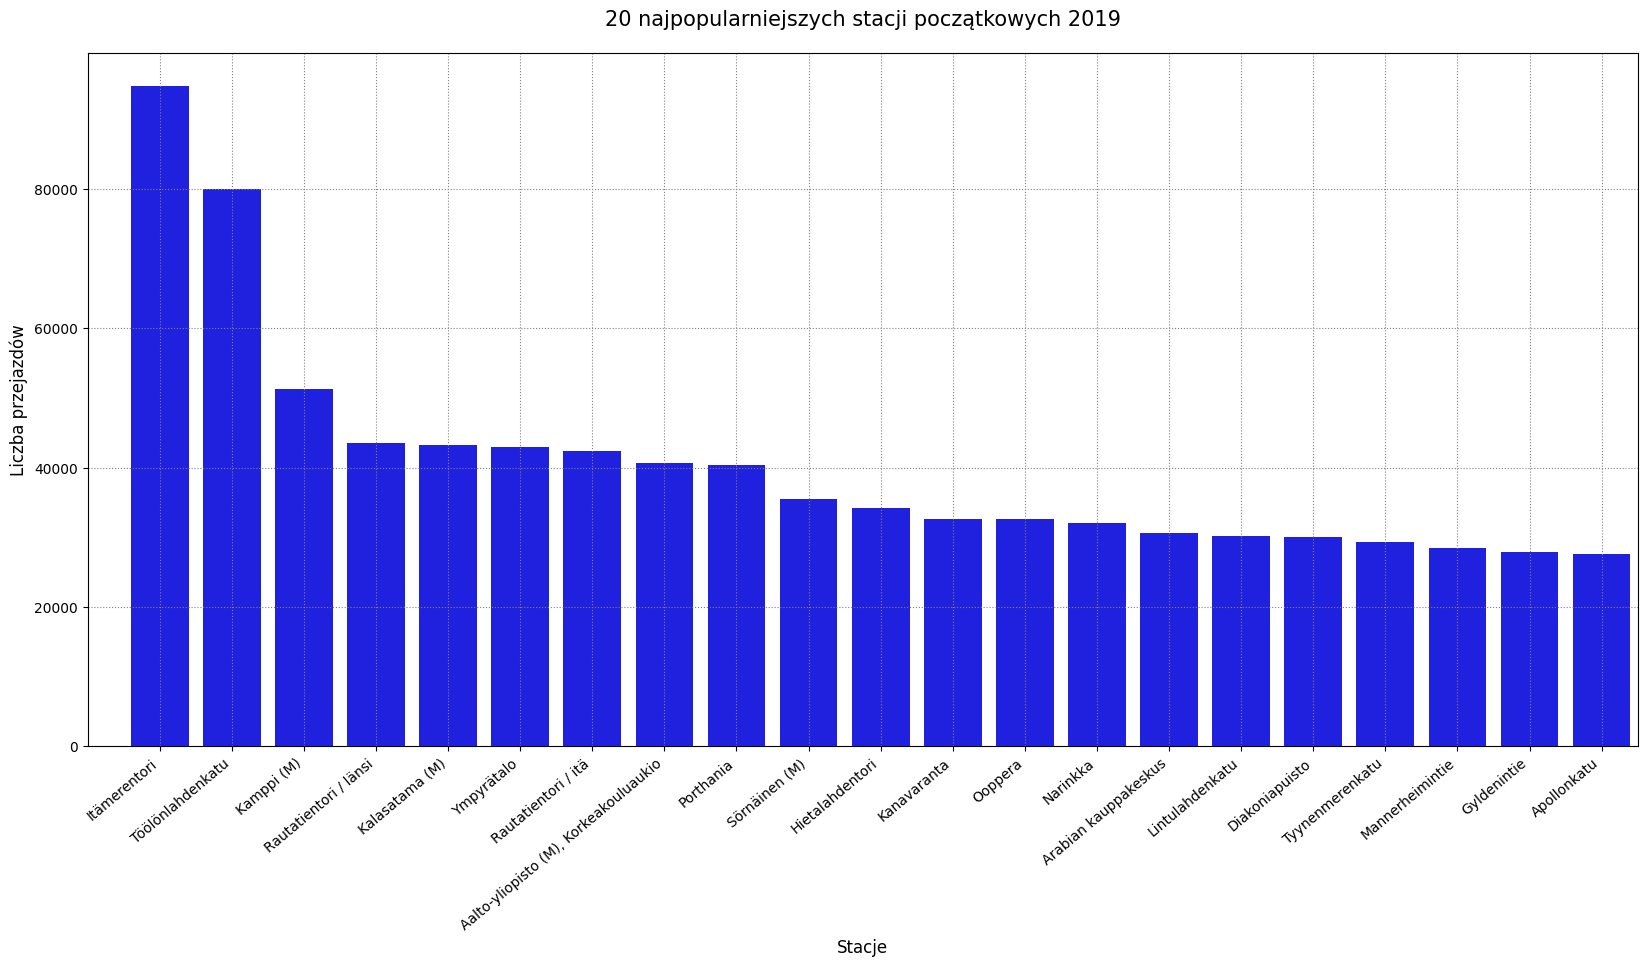

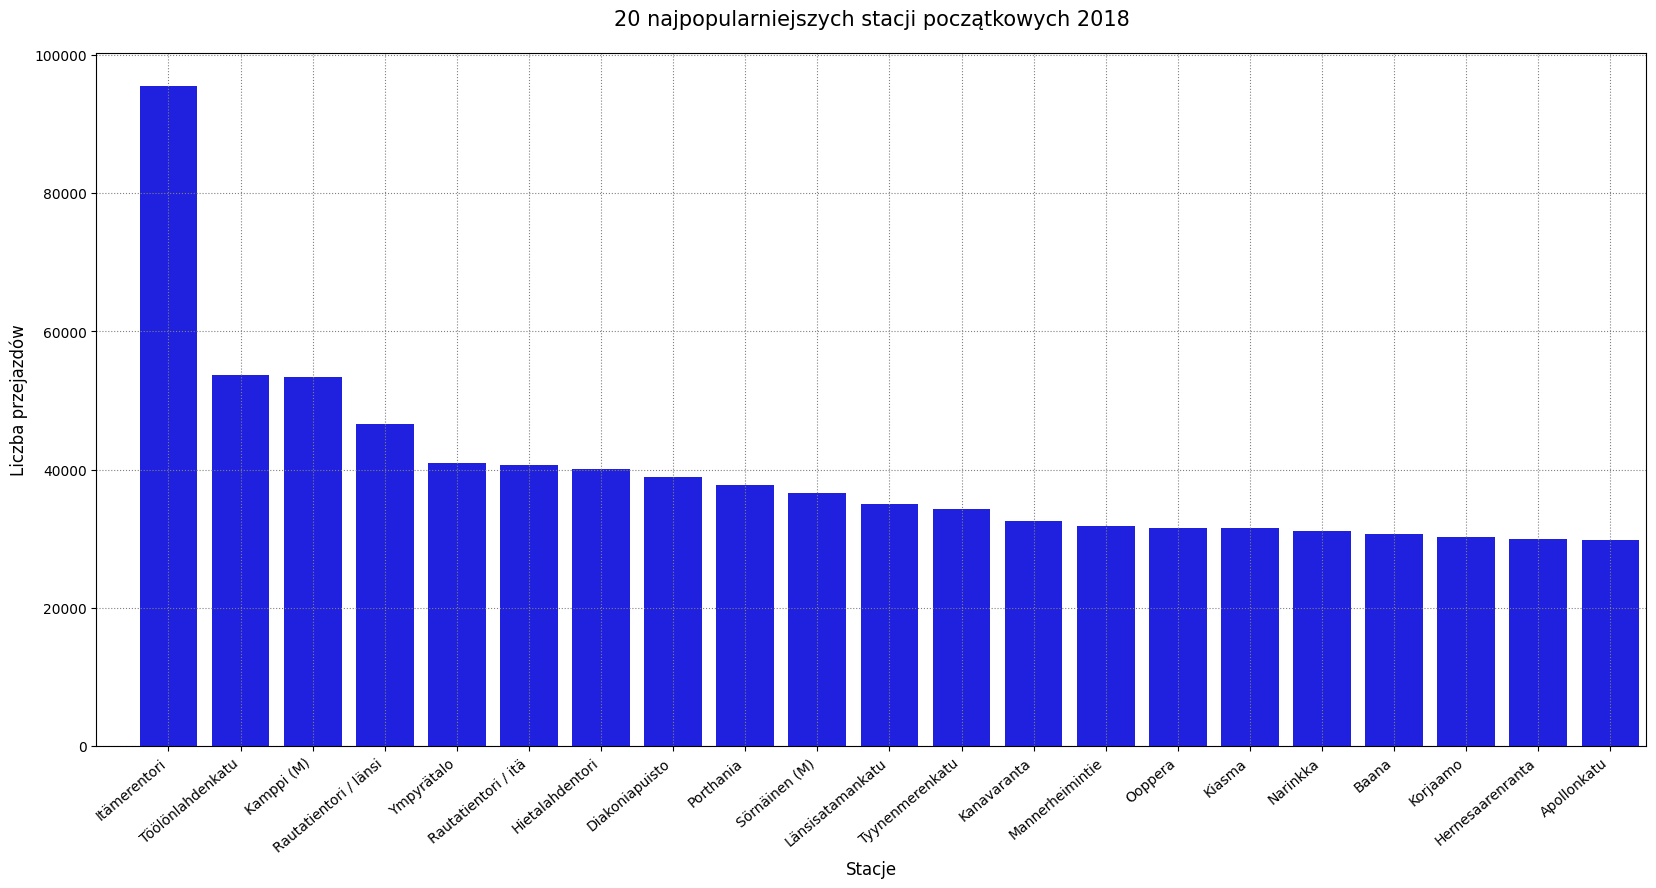

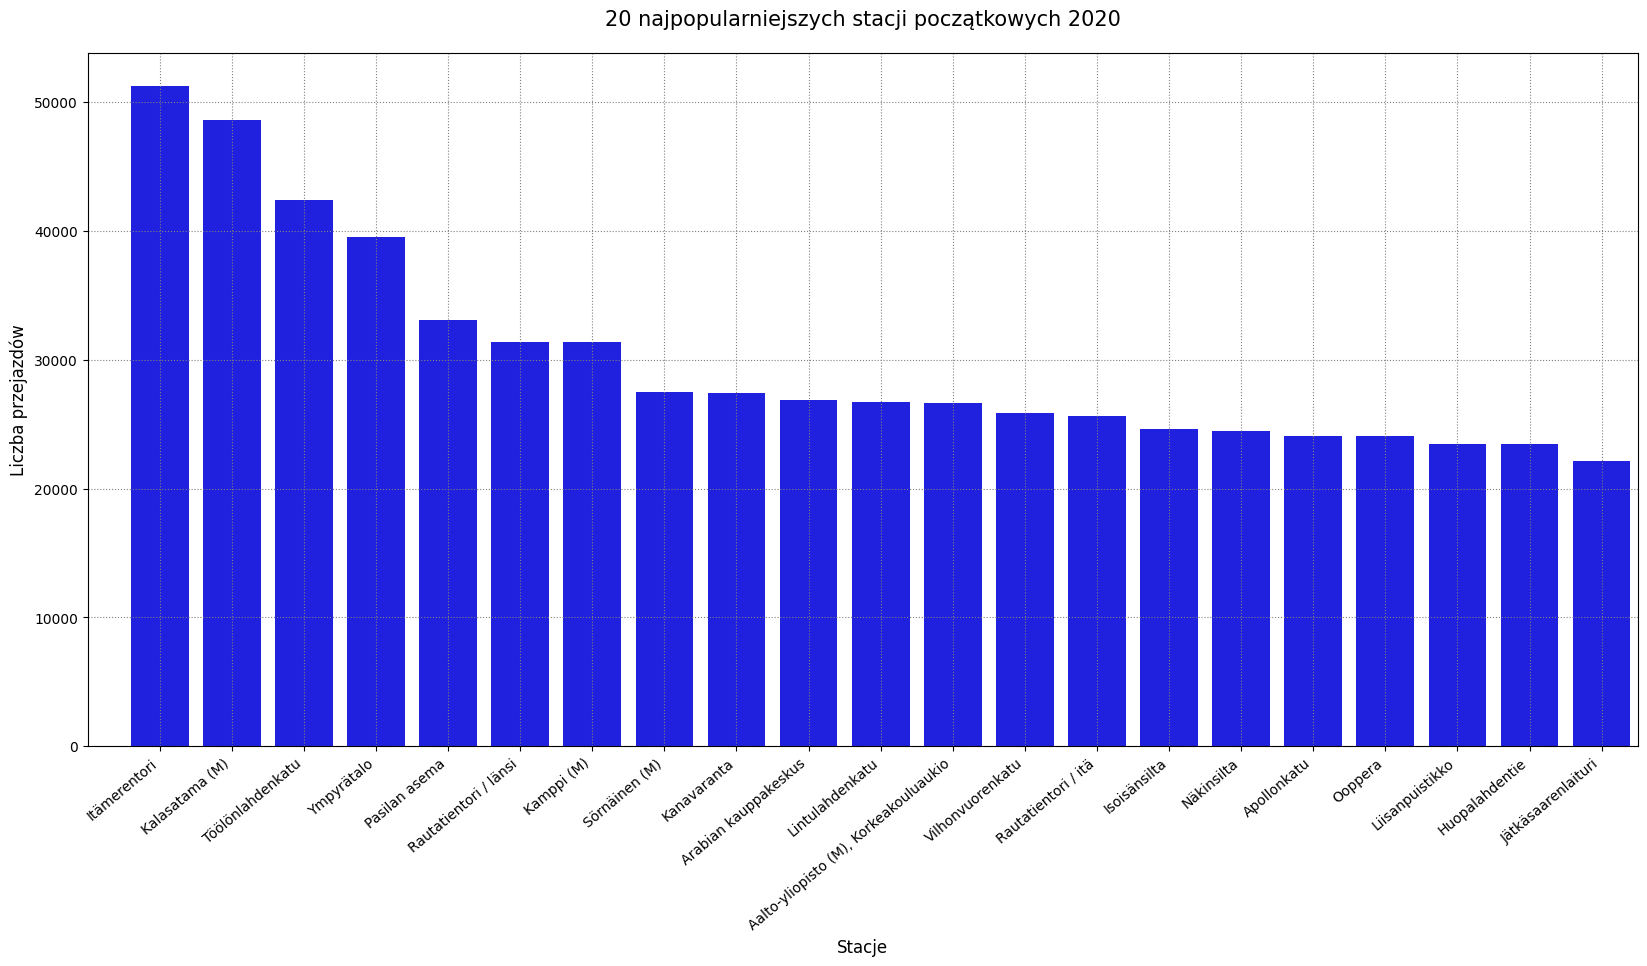

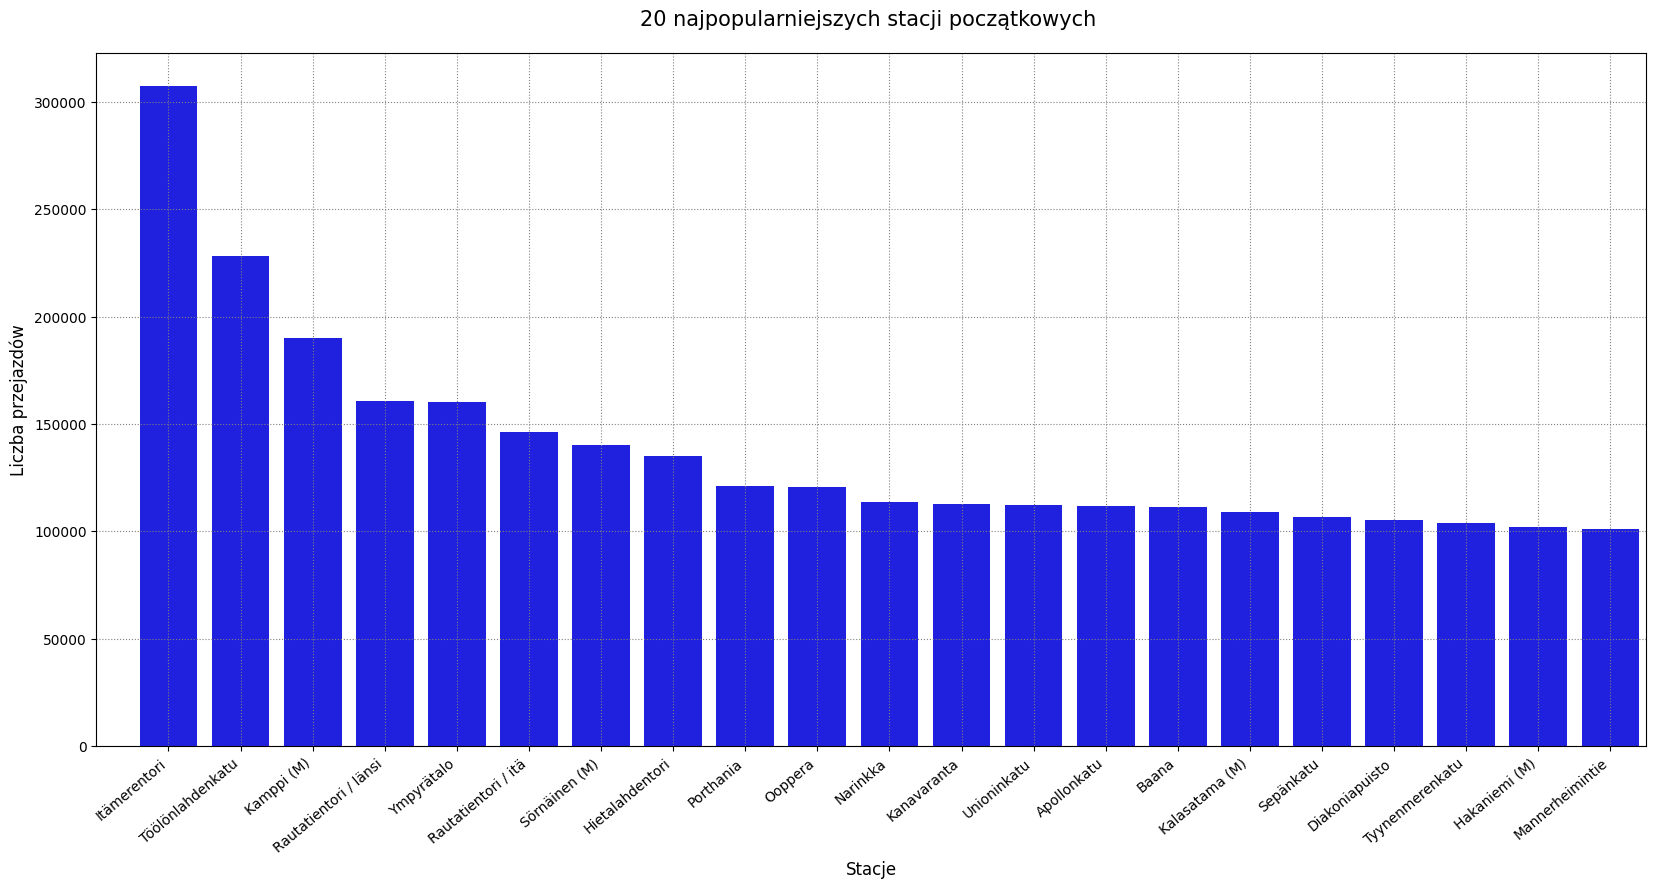

In [33]:
def top_departure_stations(dataframe, year=None):
    df = dataframe.copy()
    if year:
        df = df[df["departure"].dt.year == year]

    # Figure
    fig = plt.figure(figsize=(20, 9))
    ax = sns.countplot(
        x="departure_name",
        color='blue',
        data=df,
        order=df["departure_name"].value_counts().index,
    )

    # Labeling Axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.xlabel("Stacje", fontsize=12, x=0.5)
    plt.ylabel("Liczba przejazdów", fontsize=12)
    if year:
        plt.title("20 najpopularniejszych stacji początkowych {}".format(year), fontsize=15, pad=20)
    else:
        plt.title("20 najpopularniejszych stacji początkowych ", fontsize=15, pad=20)

    plt.xlim(-1, 20.5)

    # Adding Grid
    plt.grid(linestyle=":", color="grey")


top_departure_stations(df, 2017)
top_departure_stations(df, 2019)
top_departure_stations(df, 2018)
top_departure_stations(df, 2020)
top_departure_stations(df)

/tmp/ipykernel_221699/2906908316.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_221699/2906908316.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_221699/2906908316.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_221699/2906908316.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
/tmp/ipykernel_221699/2906908316.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


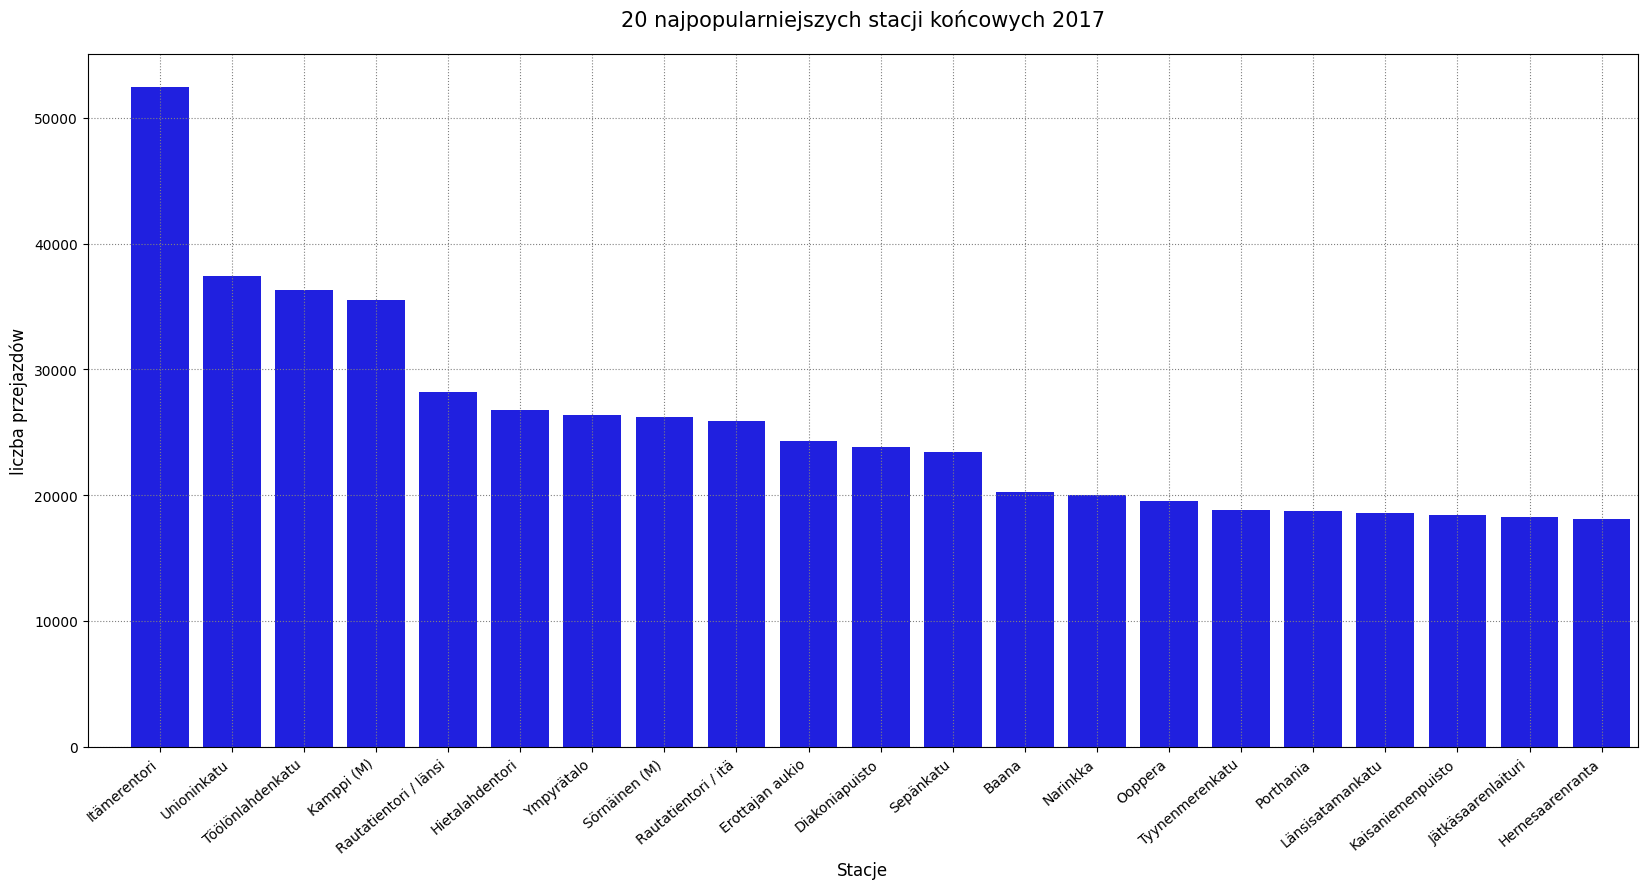

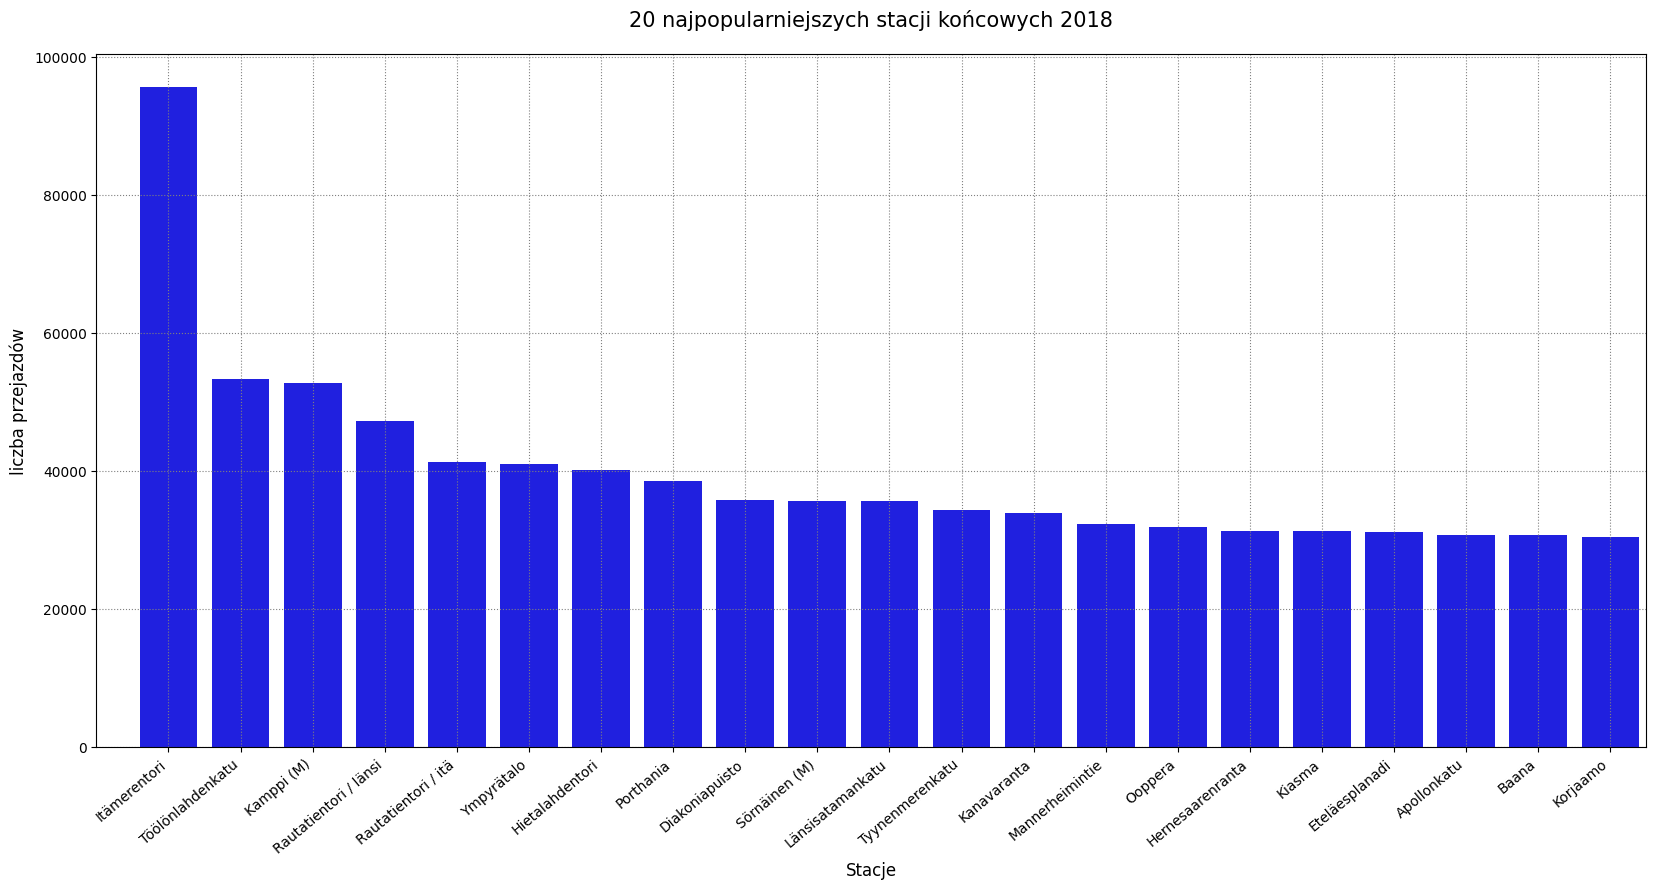

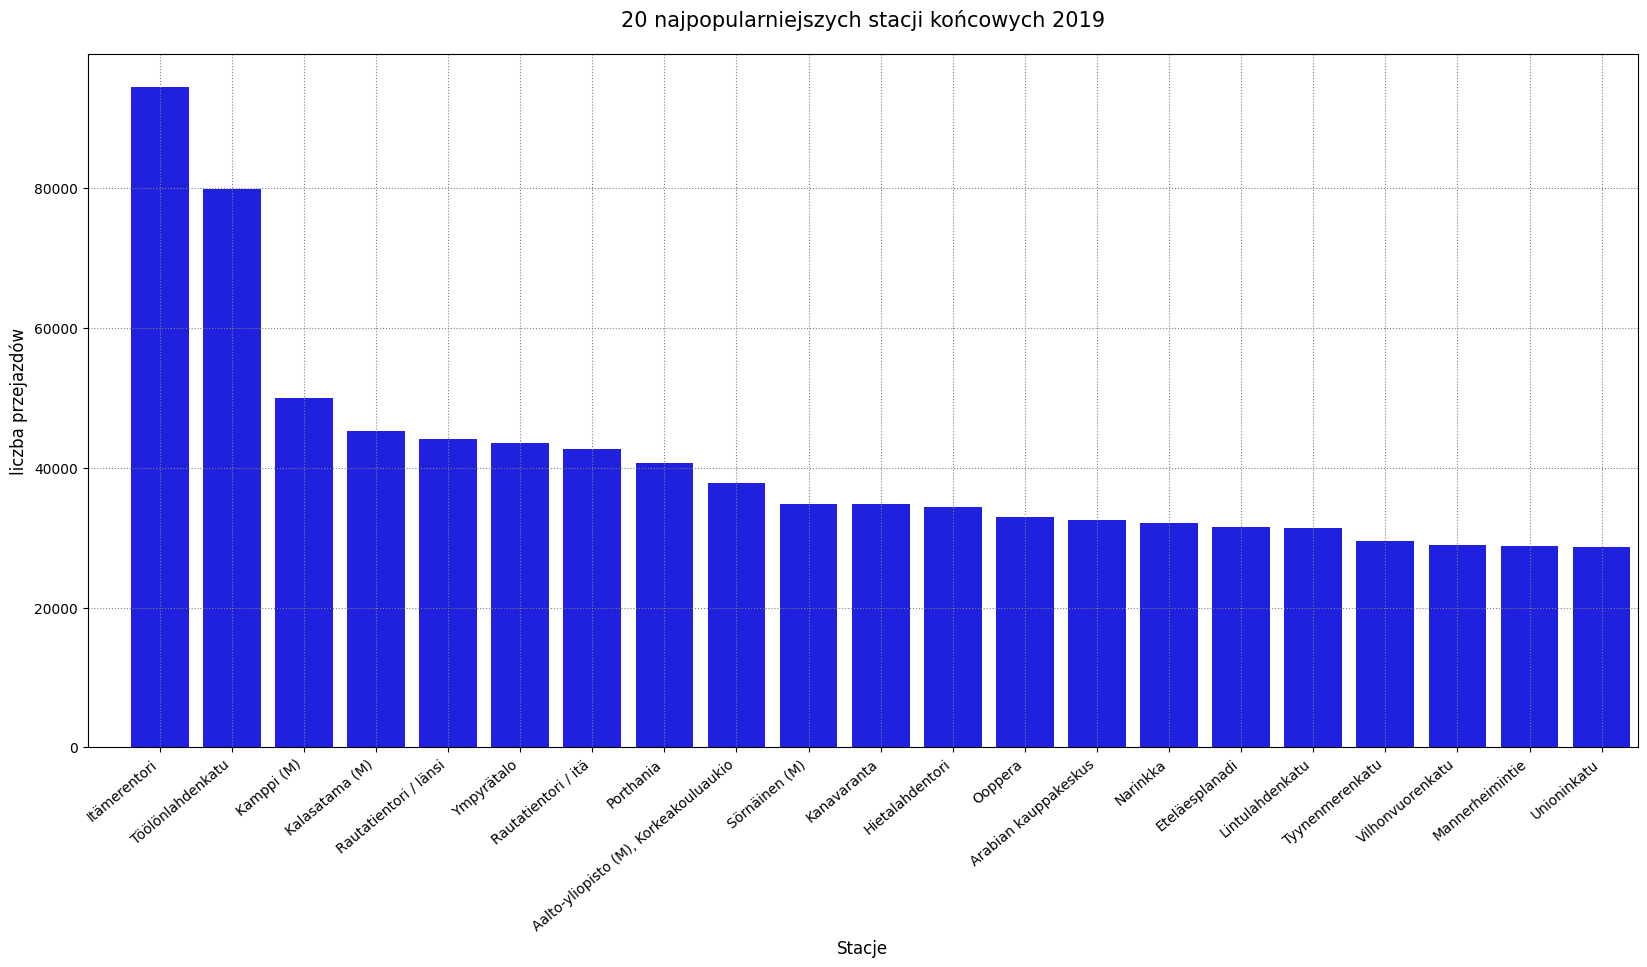

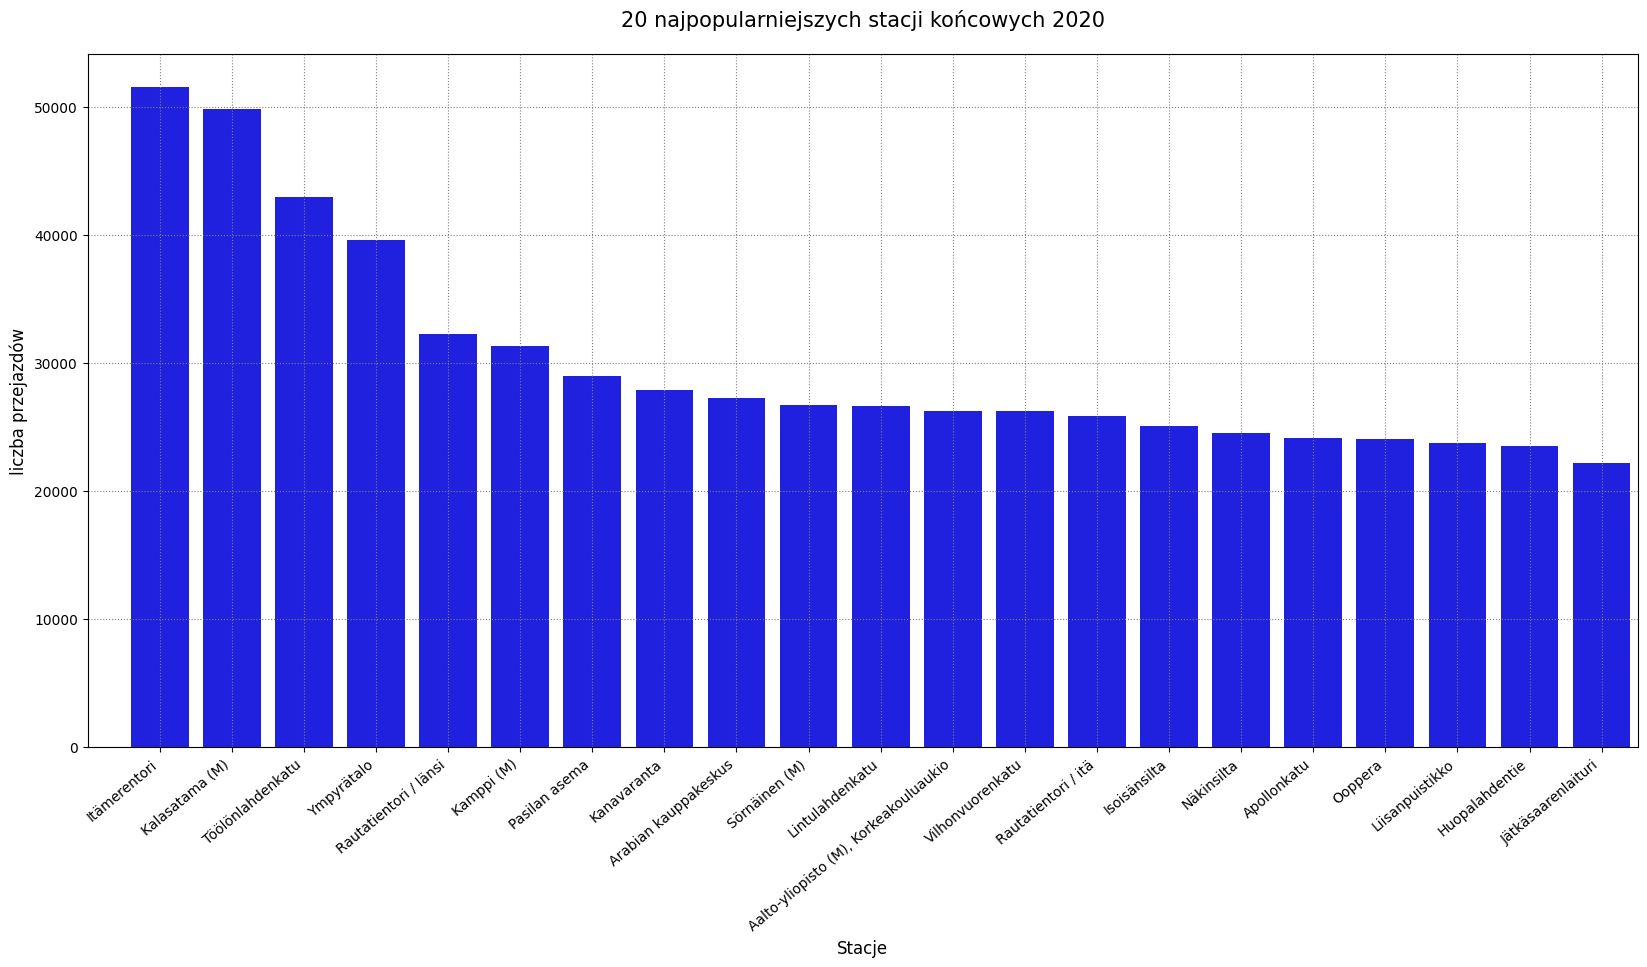

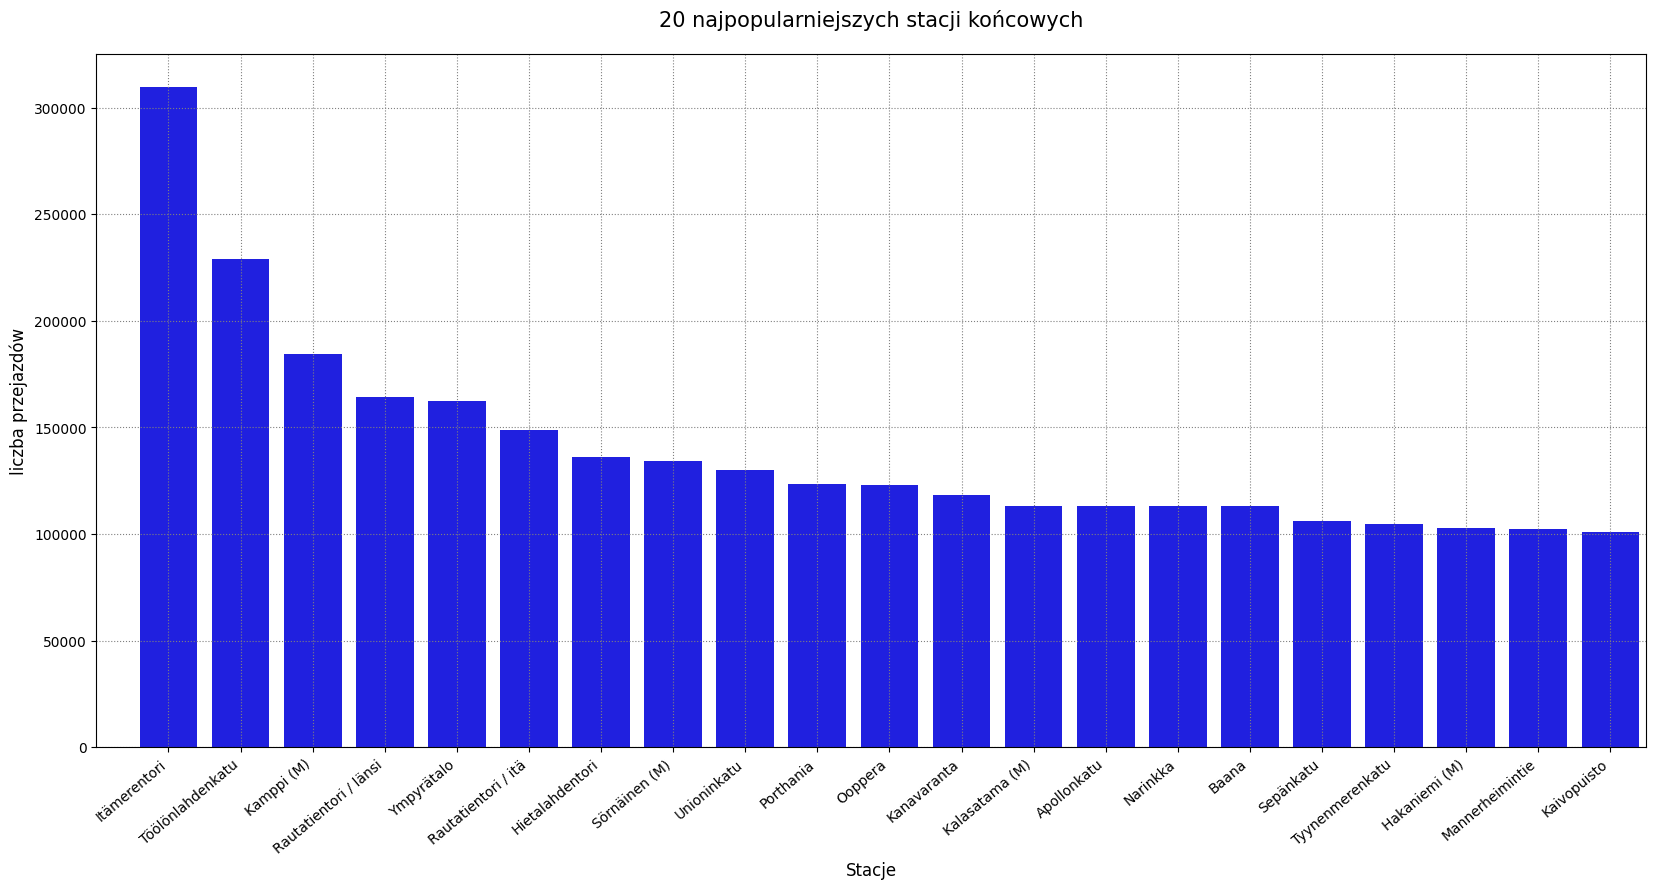

In [34]:
def top_return_stations(dataframe, year=None):
    # Data
    df = dataframe.copy()
    if year:
        df = df[df["departure"].dt.year == year]
    

    # Figure
    fig = plt.figure(figsize=(20, 9))
    ax = sns.countplot(
        x="return_name",
        color='blue',
        data=df,
        order=df["return_name"].value_counts().index,
    )

    # Labeling Axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.xlabel("Stacje", fontsize=12, x=0.5)
    plt.ylabel("liczba przejazdów", fontsize=12)
    if year:
        plt.title("20 najpopularniejszych stacji końcowych {}".format(year), fontsize=15, pad=20)
    else:
        plt.title("20 najpopularniejszych stacji końcowych" , fontsize=15, pad=20)
    plt.xlim(-1, 20.5)

    # Adding Grid
    plt.grid(linestyle=":", color="grey")


top_return_stations(df, 2017)
top_return_stations(df, 2018)
top_return_stations(df, 2019)
top_return_stations(df, 2020)
top_return_stations(df)

Save the cleaned data to a new file

In [35]:
df.to_csv("cleaned_bike.csv", index=False)